Artistic AI experiments with Deepdream algorythm
==========================

In [1]:
import utils
import PIL.Image

import numpy as np 
import tensorflow as tf

utils.load_dependencies()
net = utils.Deepdream()
T = net.T


In [ ]:
net.print_stats()

tmp_def = utils.rename_nodes(net.graph_def, lambda s:"/".join(s.split('_',1)))
net.show_graph(tmp_def)

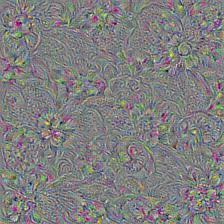

In [2]:
layer = 'mixed4d_3x3_bottleneck_pre_relu'
channel = 139

net.render_naive(T(layer)[:,:,:,channel])

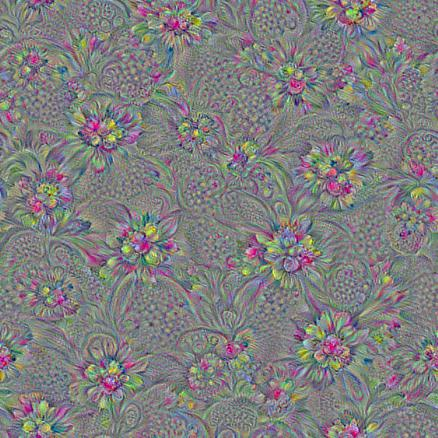

In [3]:
net.render_multiscale(T(layer)[:,:,:,channel])

In [ ]:
net.show_lap_graph()

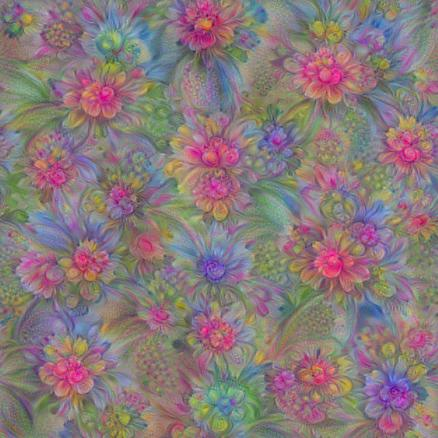

In [4]:
net.render_lapnorm(T(layer)[:, :, :, channel])

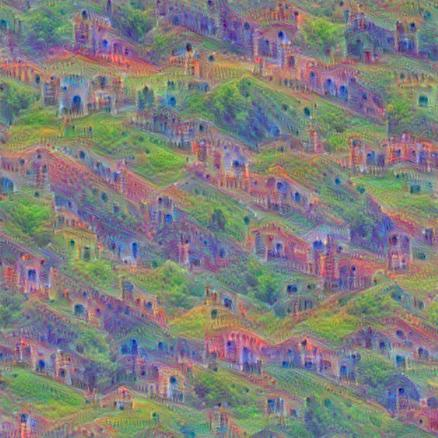

In [5]:
net.render_lapnorm(T(layer)[:,:,:,65])

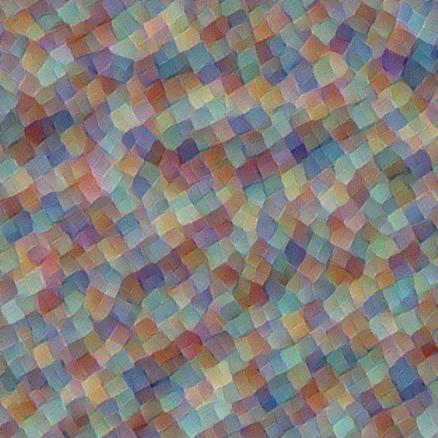

In [6]:
net.render_lapnorm(T('mixed3b_1x1_pre_relu')[:,:,:,101])

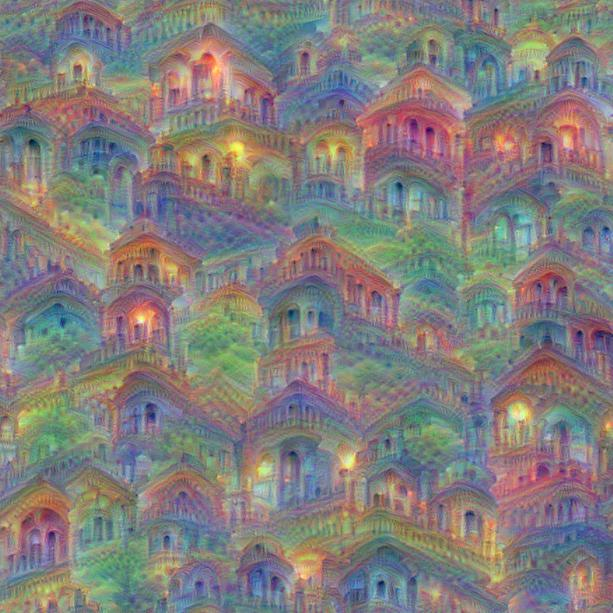

In [7]:
net.render_lapnorm(T(layer)[:,:,:,65]+T(layer)[:,:,:,66]+T(layer)[:,:,:,114], octave_n=4)

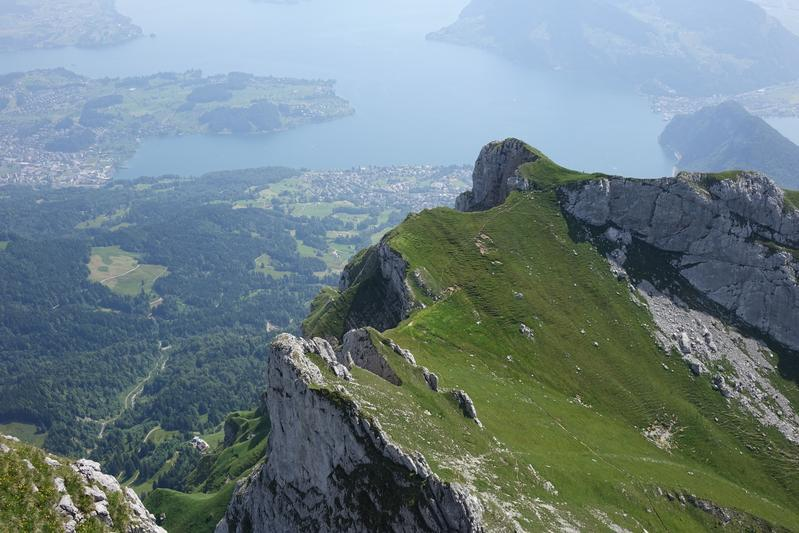

In [9]:
img0 = PIL.Image.open('images/pilatus800.jpg')
img0 = np.float32(img0)

utils.showarray(img0/255.0)

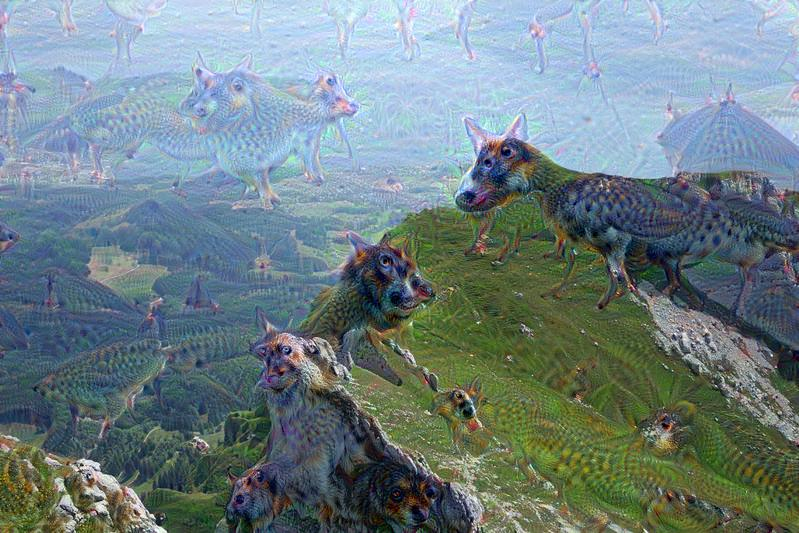

In [10]:
net.render_deepdream(tf.square(T('mixed4c')), img0)

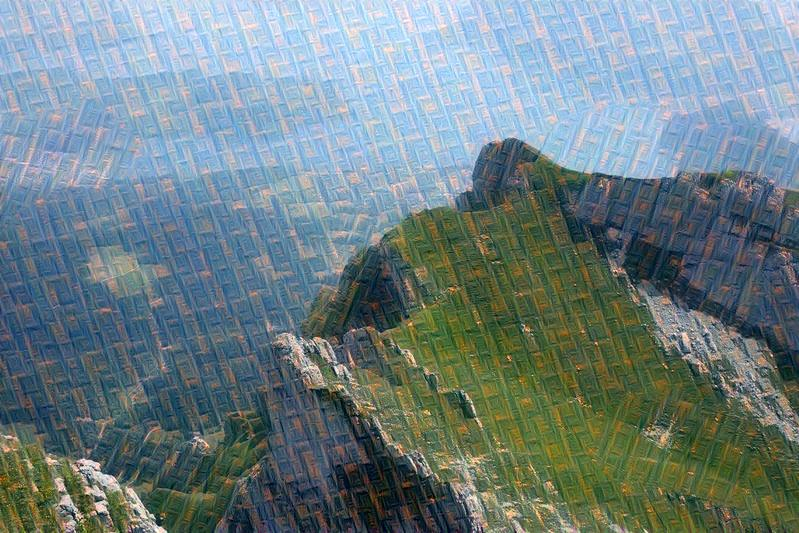

In [14]:
net.render_deepdream(T(layer)[:,:,:,66]+T(layer)[:,:,:,65], img0)

In [ ]:
net.render_deepdream(T('mixed3b_1x1_pre_relu')[:,:,:,66]+T('mixed3b_1x1_pre_relu')[:,:,:,65], img0)